# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``poisonous`` es binaria.


In [55]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import missingno as msno
import gc
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler

### Leer conjunto de datos y primer vistazo

In [56]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
df = pd.read_csv("mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
df.shape

(8124, 23)

### Exploración de datos

In [58]:
# Descripción del conjunto de datos, estándard.
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [59]:
# Información sobre el tipo de datos de cada feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
#Mostramos los valores de cada columna
for col in df.columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("-" * 40)

# La columna class es la importante e -> edible p-> poisonous


class:
class
e    4208
p    3916
Name: count, dtype: int64
----------------------------------------
cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
----------------------------------------
cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
----------------------------------------
cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
----------------------------------------
bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64
----------------------------------------
odor:
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
----------------------------------------
gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64
----------------------------------------
gill-spacing:
gill-spacing
c    6812
w  

# imputar los datos con knn imputer



In [61]:
#Primero rellenamos los valores ? en la columna stalk-root por nan
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

#### Calcular el número de nulos de cada feature

<Axes: >

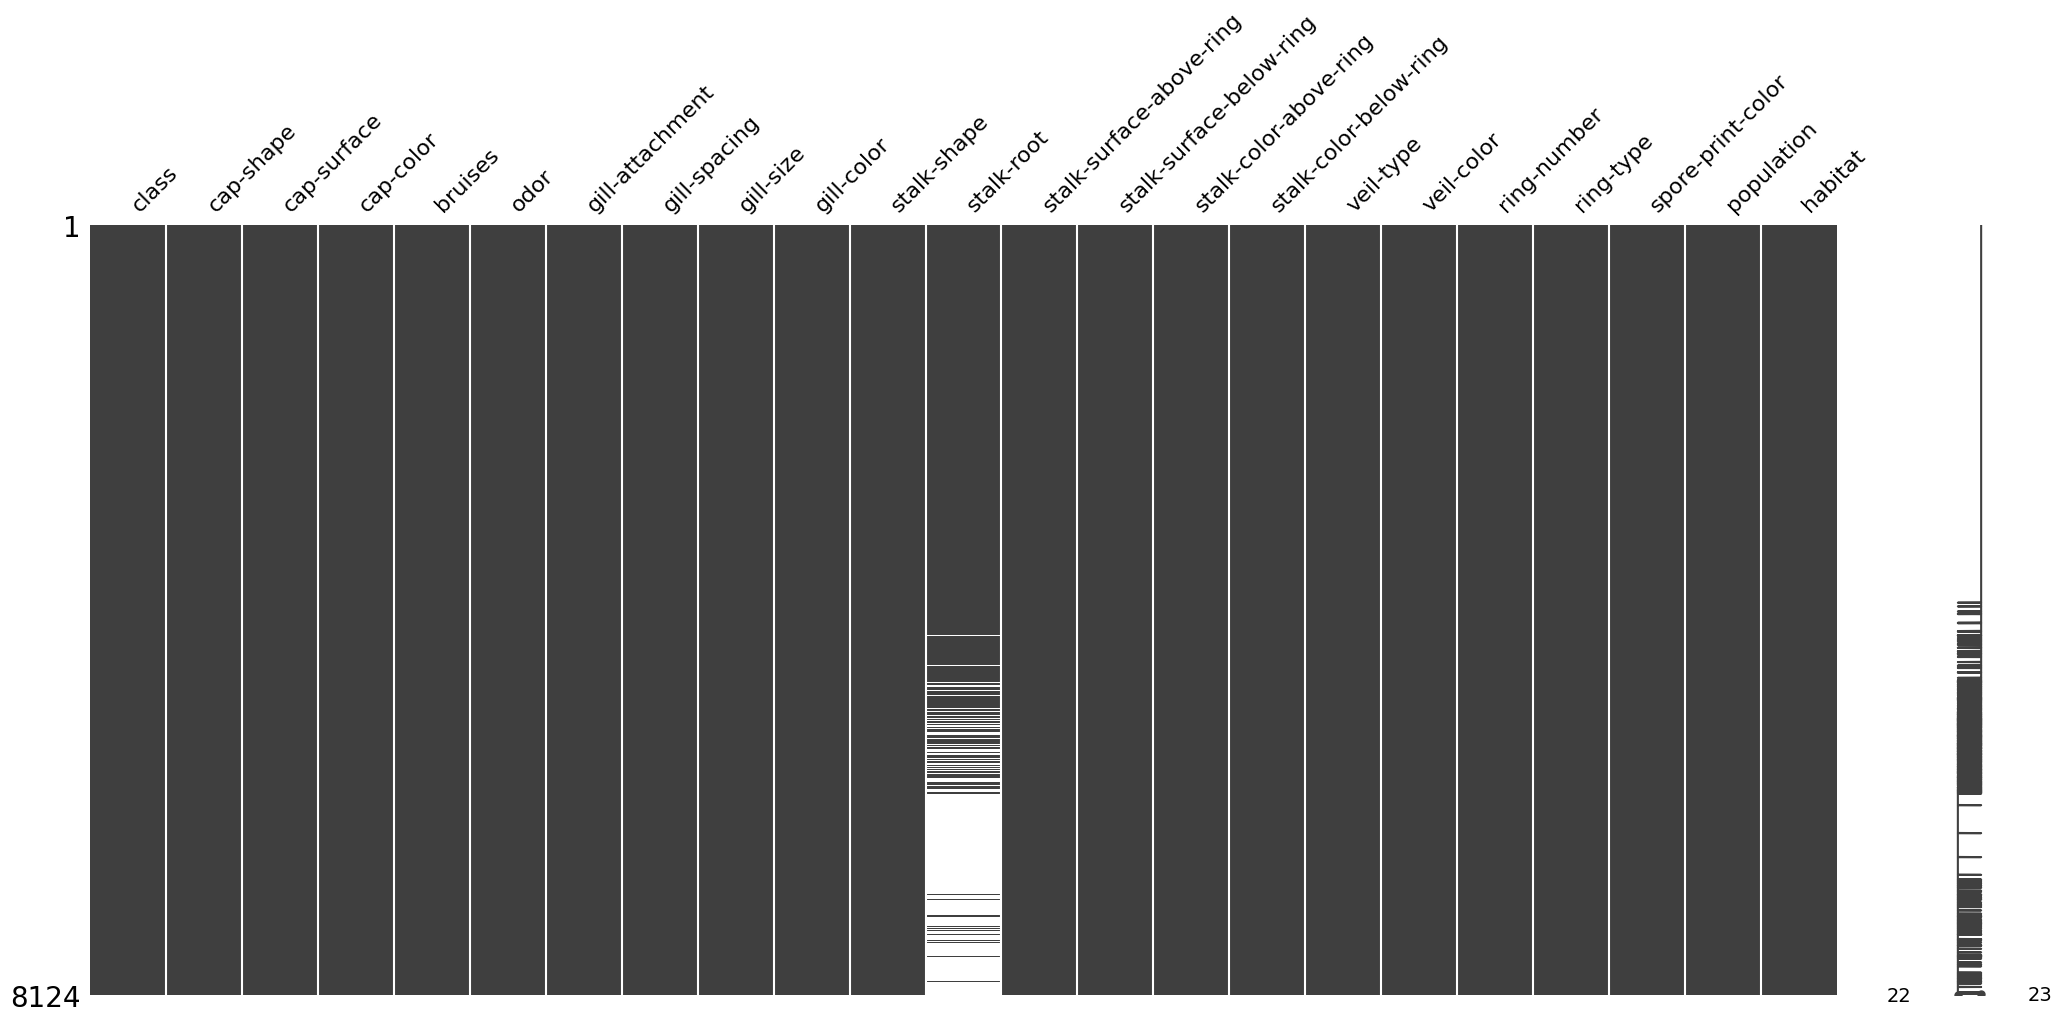

In [62]:
# Igual que otras veces, una linea, contar los nulos por variable.
msno.matrix(df)

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [63]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
df_unique_values = (
    df.select_dtypes(include='object')
      .nunique()
      .reset_index()
)

df_unique_values.columns = ['features', 'n_values']

df_unique_values


,features,n_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


In [64]:
df['veil-type']

,veil-type
0,p
1,p
2,p
3,p
4,p
...,...
8119,p
8120,p
8121,p
8122,p


#### Tratar aquellos valores que entendamos que sean nulos


In [65]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
df.isnull().sum() # Como se puede observar no hay valores nulos, con lo que no hace falta imputación.

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [66]:
# Dejar por el camino si procede.
df.drop(columns=['veil-type'], inplace=True) #Eliminamos veil-type ya que solo tiene un valor

#### Separar entre variables predictoras y variables a predecir

In [67]:
# Antes de separar el conjunto de datos voy a convertir el tipo de columna de objet a category
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].astype('category')

df.dtypes

,0
class,category
cap-shape,category
cap-surface,category
cap-color,category
bruises,category
odor,category
gill-attachment,category
gill-spacing,category
gill-size,category
gill-color,category


# Análisis exploratorio detallado EDA


In [68]:
# Primero vamos a analizar la variable a predecir
df['class'].value_counts()

,count
class,
e,4208
p,3916


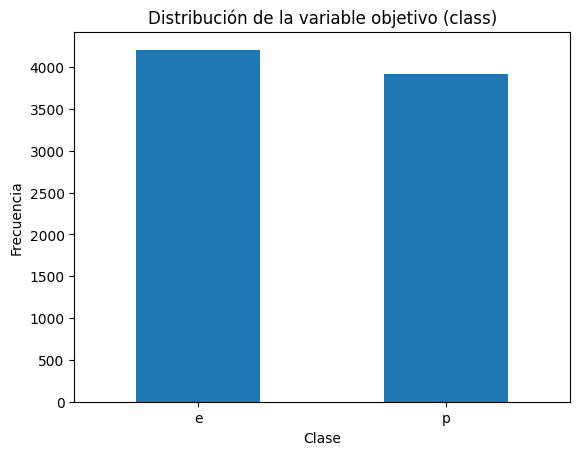

In [69]:
#Gráfico para mostrar la distribución de la variable objetivo
df['class'].value_counts().plot(kind='bar')

plt.title('Distribución de la variable objetivo (class)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


Se puede observar que hay una distribución muy parecida, algo mas inclinada a 'e' que es elegible es decir comestible, y 'p' poisonous

# Análisis univariado

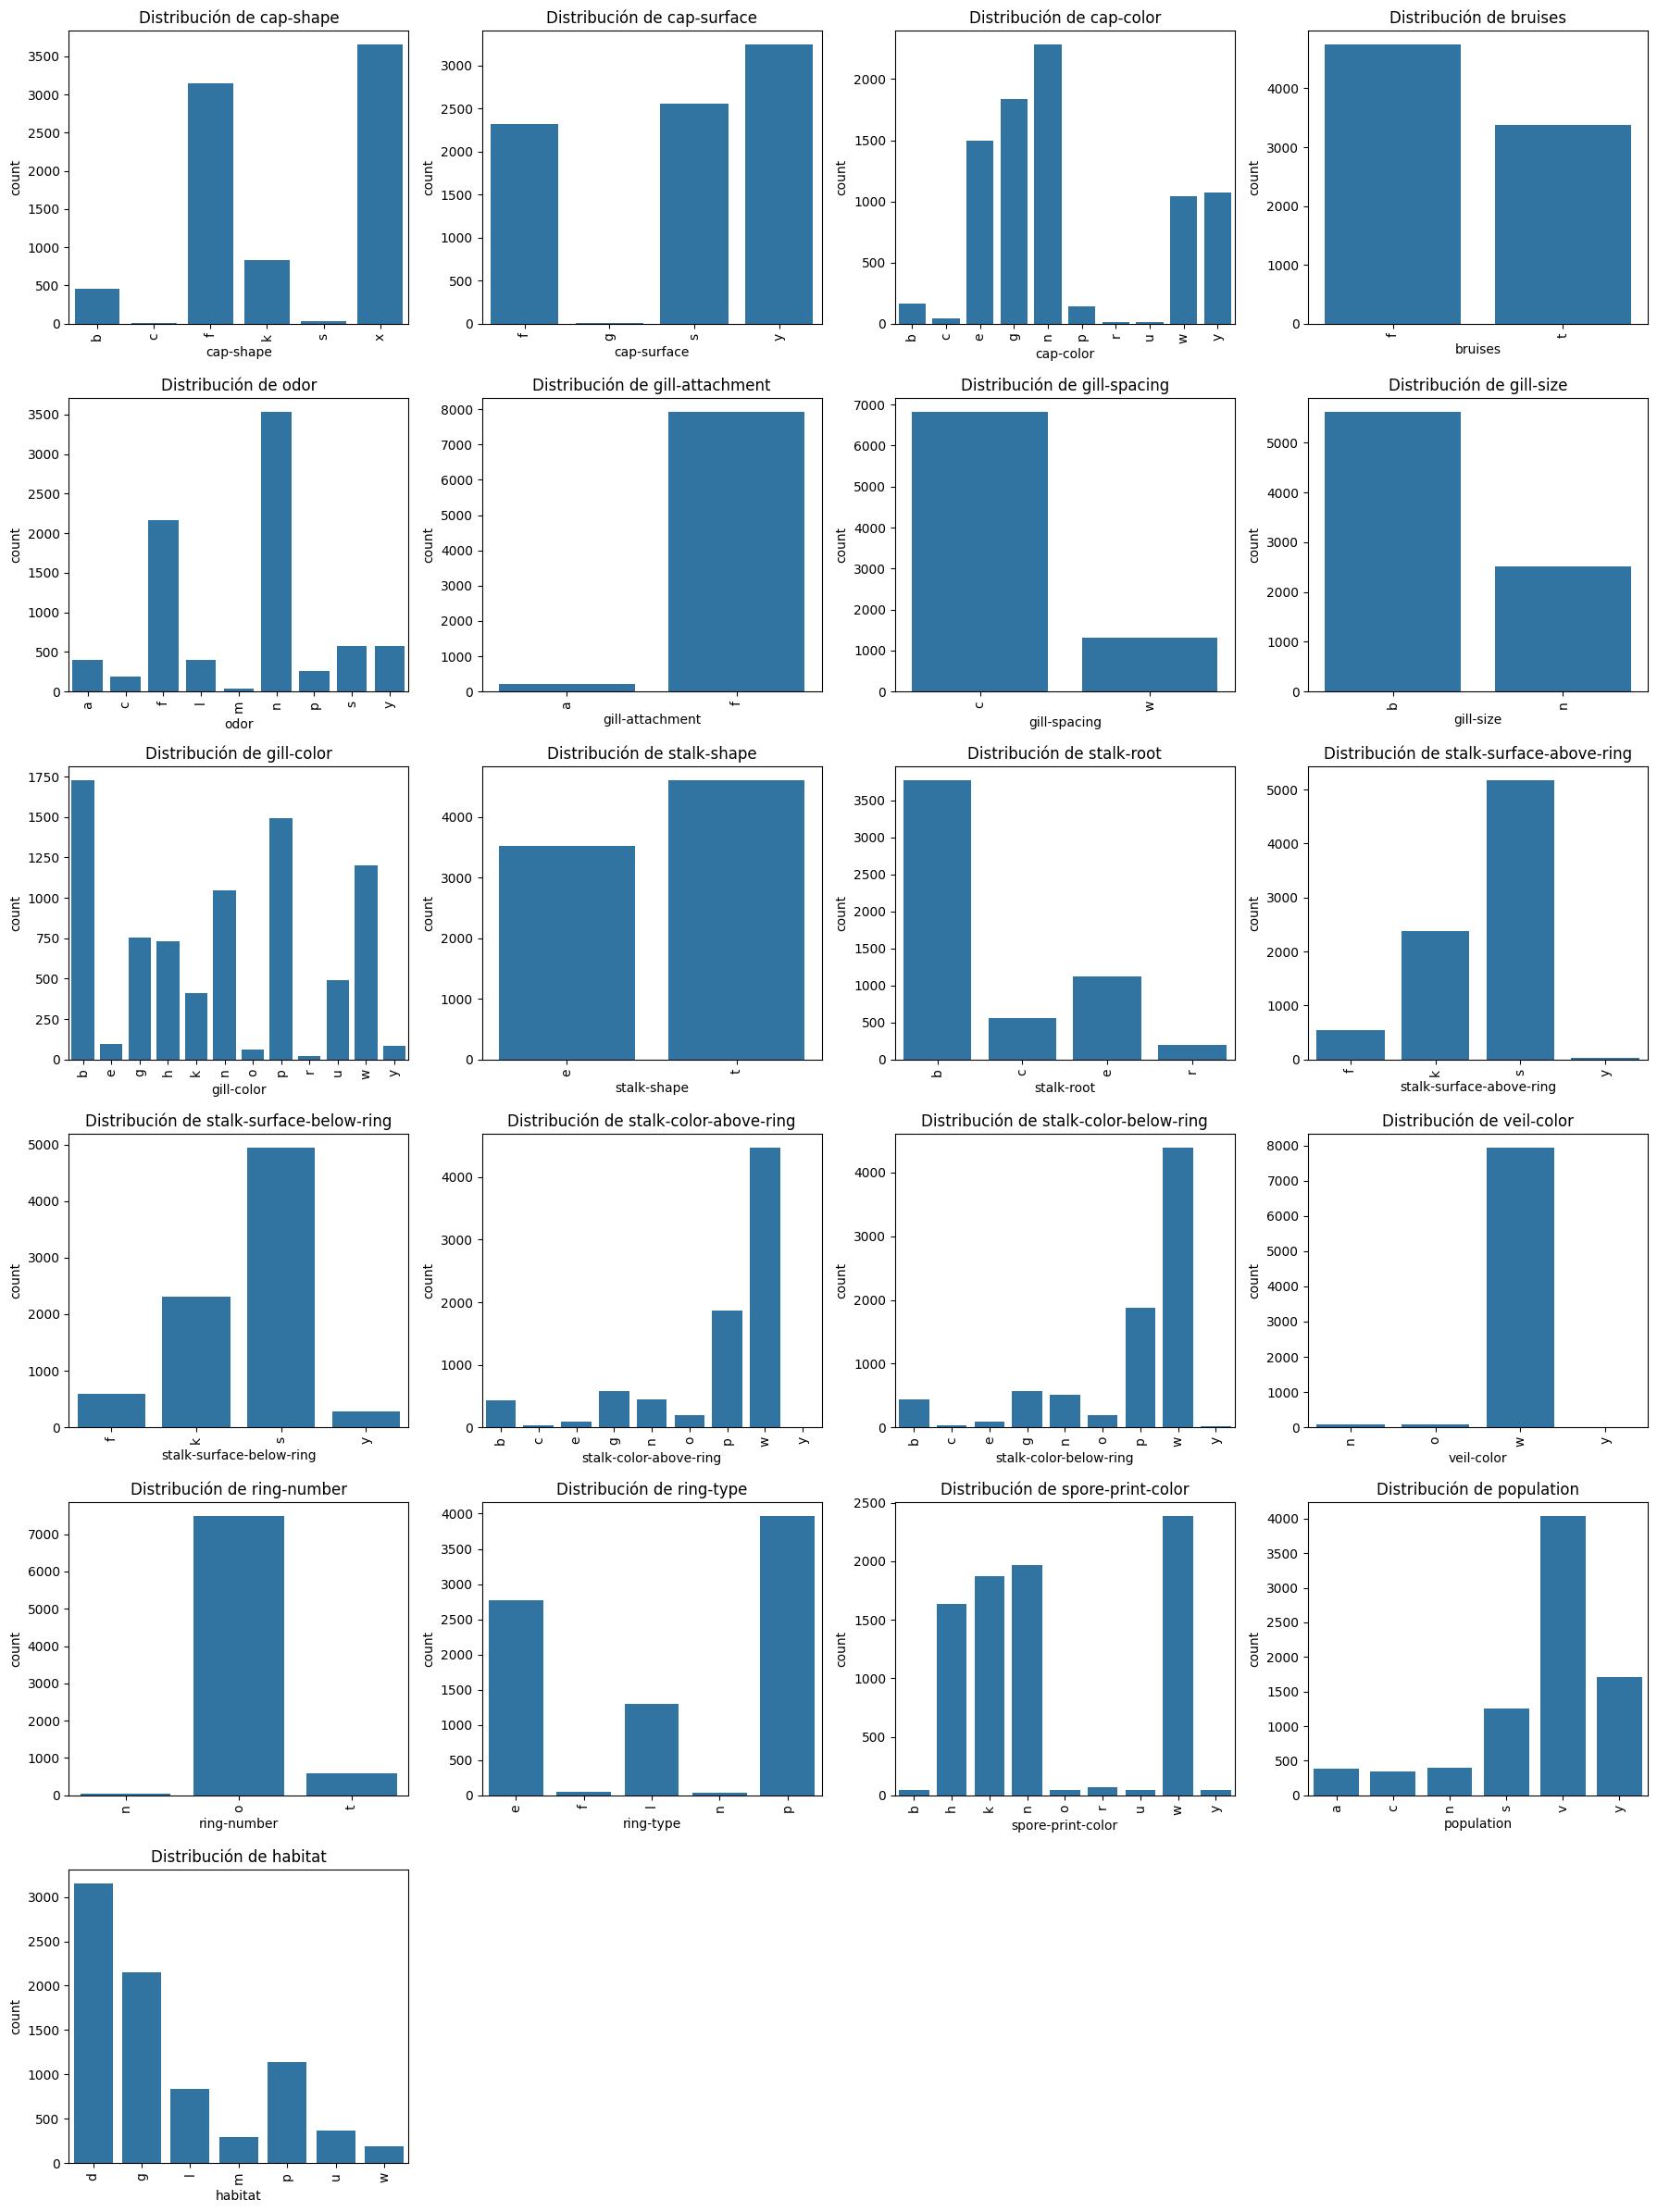

In [70]:
import math
# Esto es una forma de enseñar una gráficas con todas las demás variables en un solo axe y ver su distribución
features = df.drop(columns=['class']).columns

n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Análisis Bivariado con class

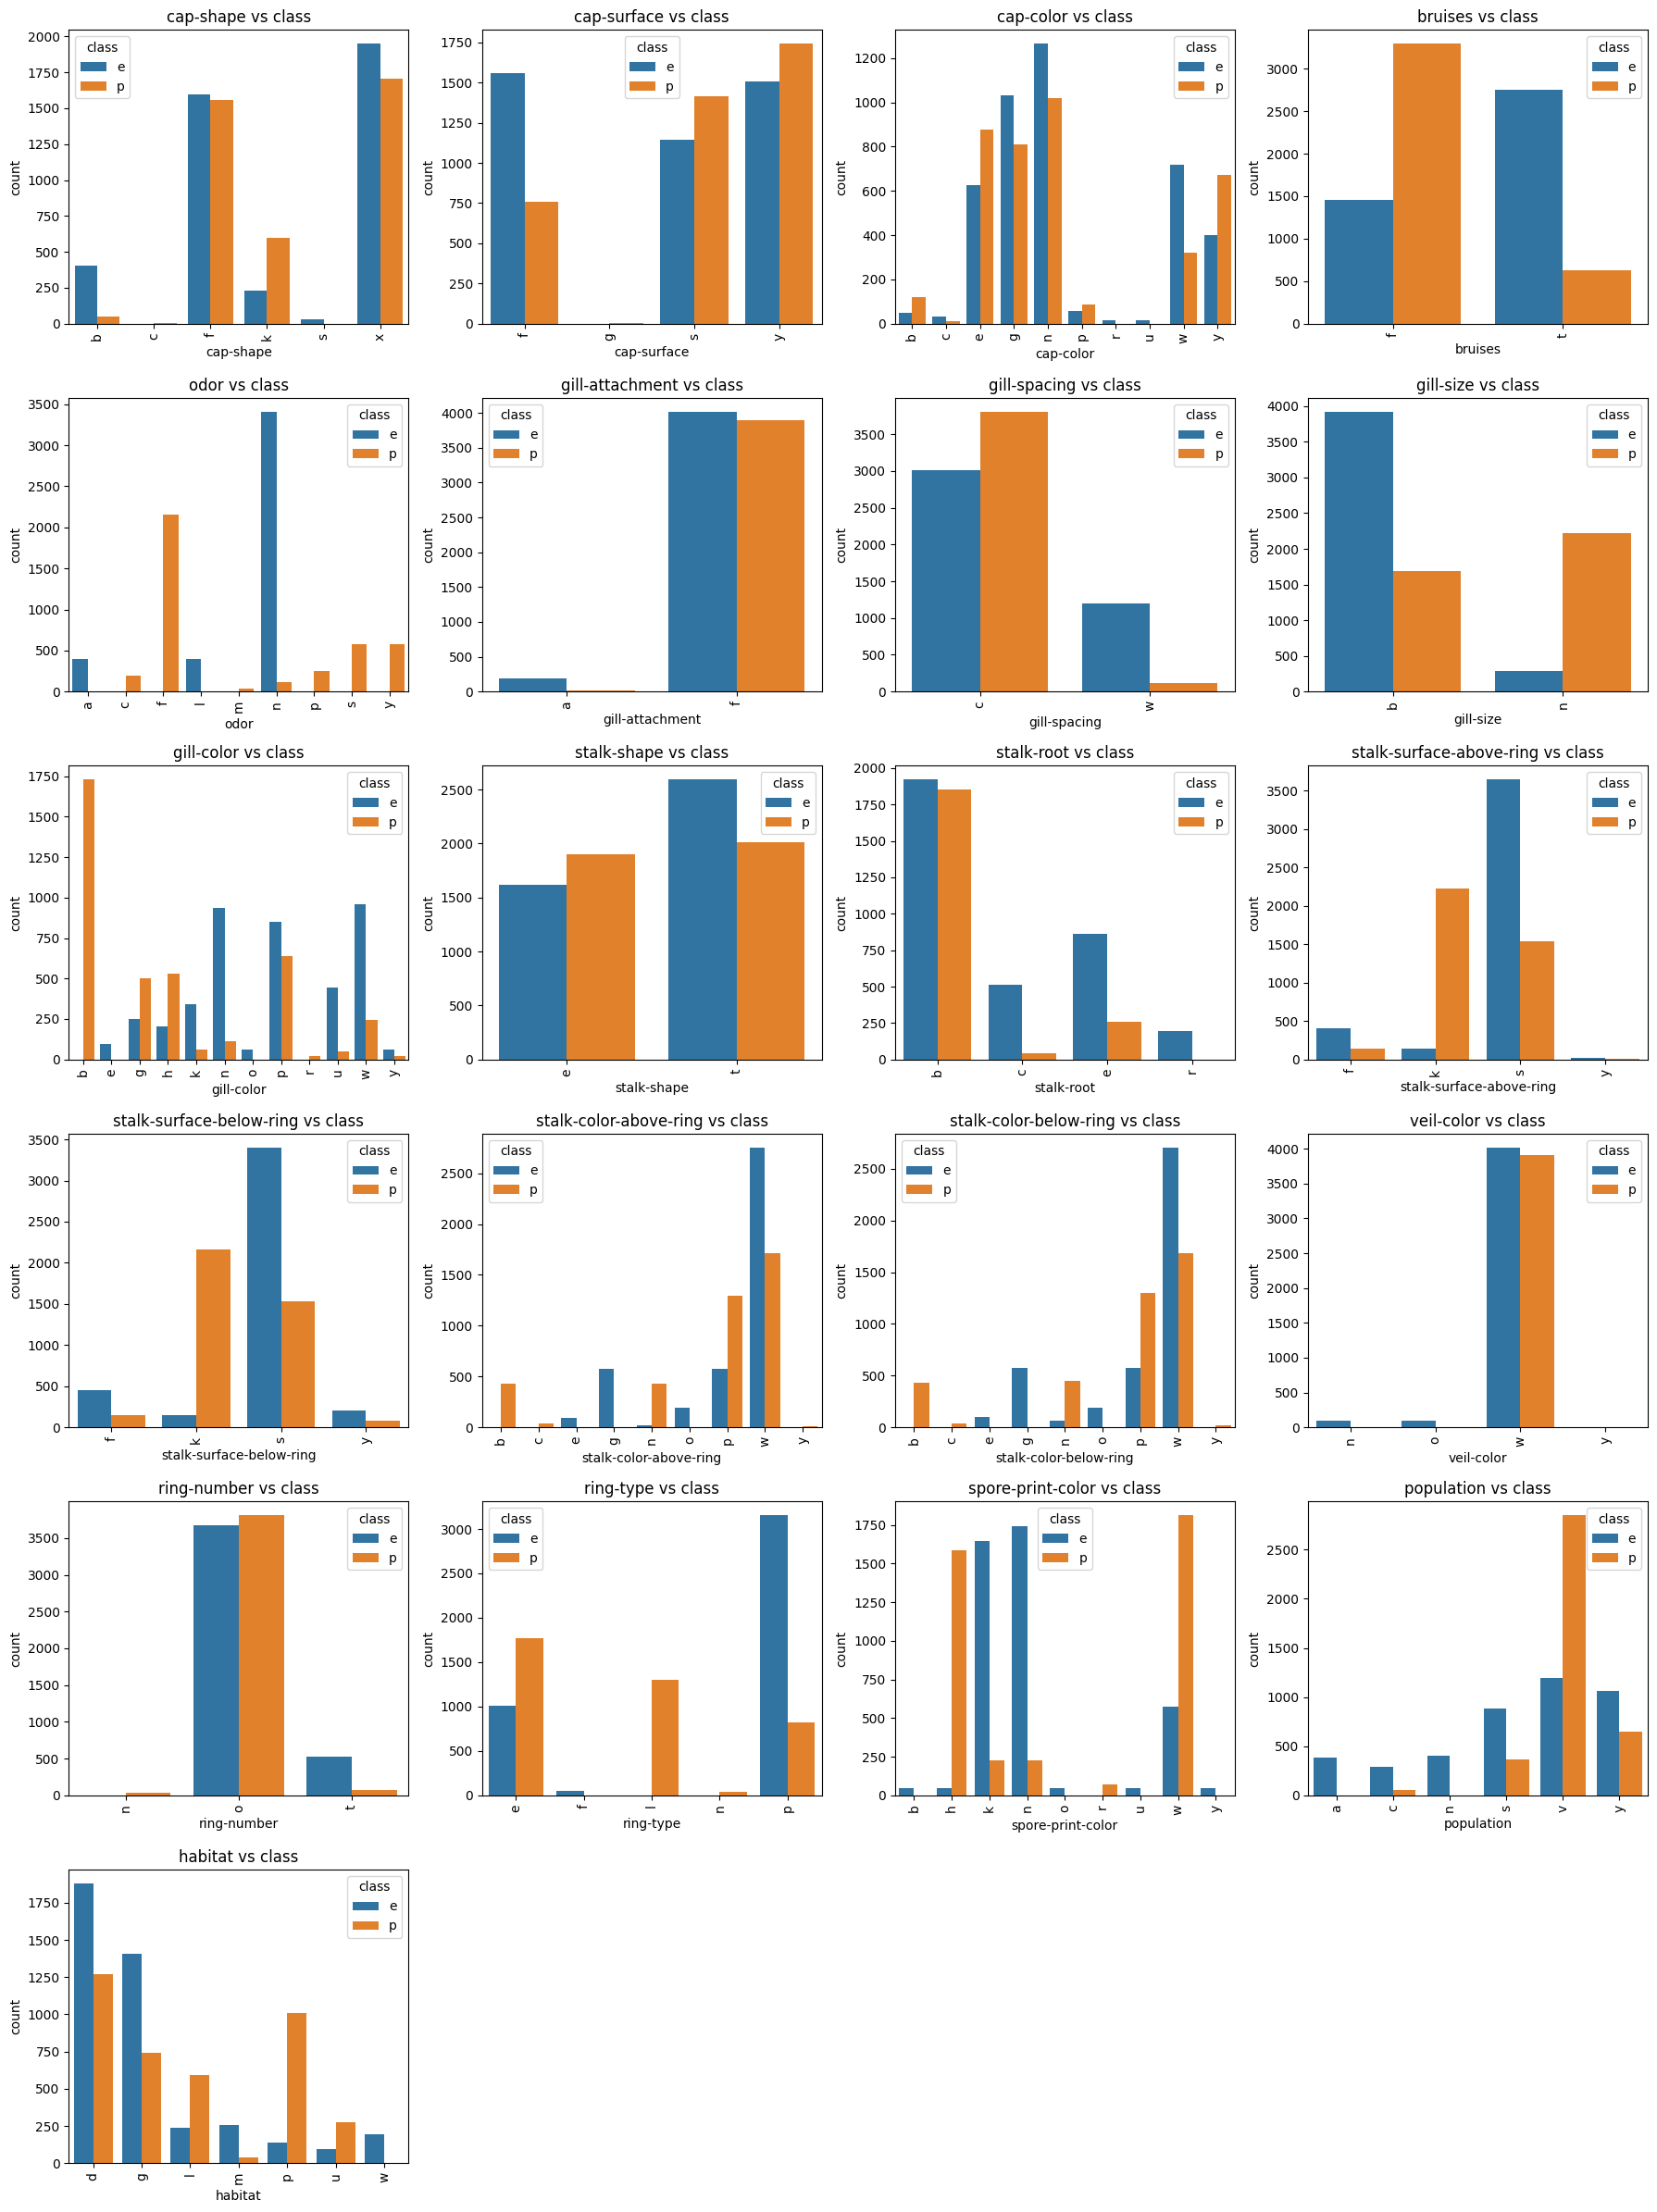

In [71]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.countplot(data=df, x=col, hue='class', ax=axes[i])
    axes[i].set_title(f'{col} vs class')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [72]:
# La variable que trata de predecir este conjunto de datos es 'poisonous'.
y = df['class']
X = df.drop(columns=['class'])

#### Codificar correctamente las variables categóricas a numéricas

#### Train test split

In [73]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import numpy as np

# Encode y
le = LabelEncoder() # utilizamos labelencoder para tener y como 1 y 0
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# OrdinalEncoder on X (fit only on train)
ordinal_enc = OrdinalEncoder() # encodeamos las variables de forma ordinal para el knnimputter
X_train_ord = ordinal_enc.fit_transform(X_train)
X_test_ord = ordinal_enc.transform(X_test)

# KNNImputer (fit only on train) Realizamos el KNNimputer
imputer = KNNImputer(n_neighbors=5)
X_train_imp = imputer.fit_transform(X_train_ord)
X_test_imp = imputer.transform(X_test_ord)

# Round and inverse transform back to categories # volvemos a las categorias
X_train_imp = np.round(X_train_imp)
X_test_imp = np.round(X_test_imp)
X_train_cat = ordinal_enc.inverse_transform(X_train_imp)
X_test_cat = ordinal_enc.inverse_transform(X_test_imp)

# Back to dataframe
X_train_cat = pd.DataFrame(X_train_cat, columns=X_train.columns)
X_test_cat = pd.DataFrame(X_test_cat, columns=X_test.columns)

# OneHotEncoder (fit only on train) #volvemos a codificar X con onehotencoder
ohe = OneHotEncoder(sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

In [87]:
# Display null counts for X_train_cat after imputation
print("Nulls in X_train_cat after KNNImputer:")
display(X_train_cat.isnull().sum())

Nulls in X_train_cat after KNNImputer:


,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

Explained variance ratio: [0.08718418 0.07723134]
Total variance retained: 16.44%


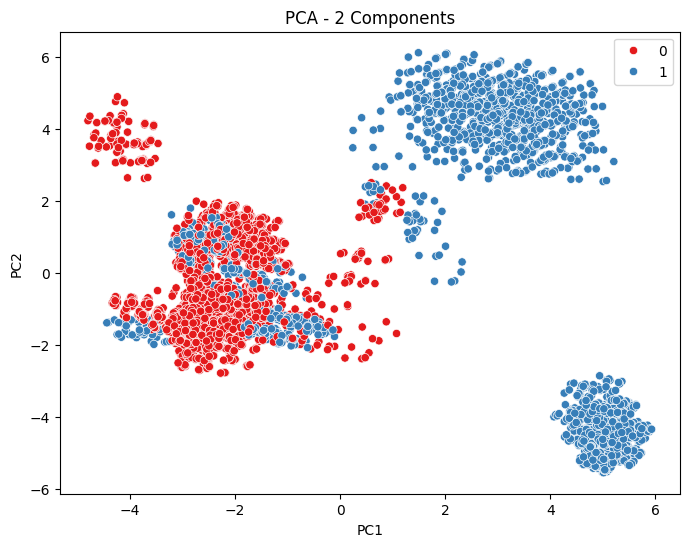

In [76]:
# Scale first Se recomienda scalar porque PCA en sensible a valores altos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

pca = PCA(n_components=2)      # metodo de sklearn
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how much variance is retained
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance retained: {sum(pca.explained_variance_ratio_):.2%}")

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train_enc, palette='Set1')
plt.title('PCA - 2 Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Definir el clasificador y el número de estimadores
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# 2. Entrenar en train
rf.fit(X_train_encoded, y_train_enc)
# 3. Calcular la precisión sobre test
y_pred = rf.predict(X_test_encoded)
accuracy = accuracy_score(y_test_enc, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [78]:
X_train_encoded.shape

(5443, 115)

¿Muchas features no? Vamos a reducir las usando PCA.

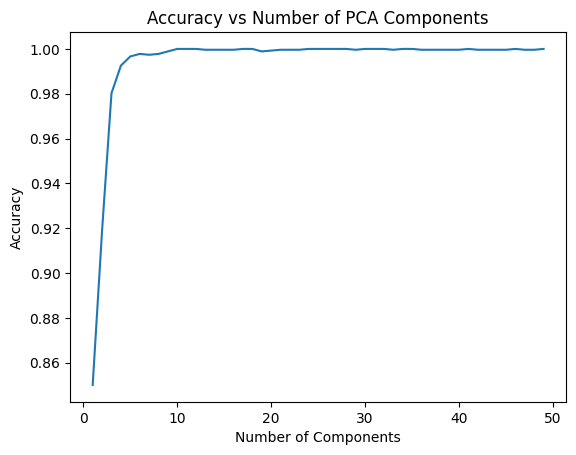

In [79]:
n_features = range(1, 50)# definir un rango de valores a probar
scores = []

for n in n_features:

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    # 2. Aprender PCA sobre X_train
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Entrenar Random Forest
    # 1. Definir el RF
    # 2. Entrenar clasificador
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train_enc)

    # Guardar el score
    y_pred = rf.predict(X_test_pca)
    scores.append(accuracy_score(y_test_enc, y_pred))


sns.lineplot(x=n_features, y=scores)
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.show()


Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

# Mostramos las variables importantes para el score con el randomforest

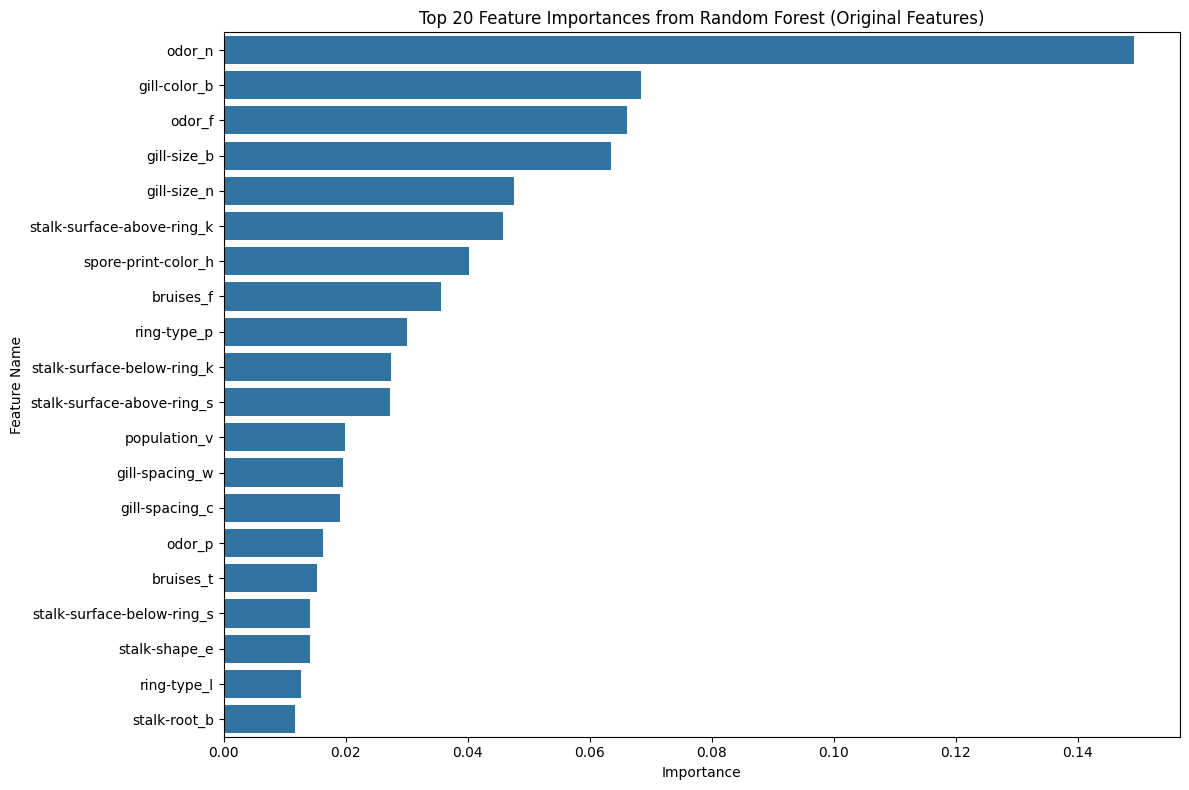

In [80]:
feature_names = ohe.get_feature_names_out(X_train_cat.columns)

# Create a new RandomForestClassifier trained on the full one-hot encoded data
# to get feature importances for the original features
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_train_encoded, y_train_enc)

# Create a DataFrame for feature importances using this new model
feature_importances = pd.Series(rf_for_importance.feature_importances_, index=feature_names)

# Sort the features by importance and take the top N (e.g., top 20)
top_n_features = 20
important_features = feature_importances.nlargest(top_n_features)

plt.figure(figsize=(12, 8))
sns.barplot(x=important_features.values, y=important_features.index)
plt.title(f'Top {top_n_features} Feature Importances from Random Forest (Original Features)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# If you want to see the PCA loadings to interpret components:
# You would need to access the components_ attribute of your fitted pca object.
# pca_full = PCA(n_components=X_train_scaled.shape[1]) # Fit PCA on all components
# pca_full.fit(X_train_scaled)
# loadings = pd.DataFrame(pca_full.components_.T, columns=[f'PC{i+1}' for i in range(pca_full.n_components_)],
#                         index=feature_names)
# print("PCA Loadings for the first 2 principal components:\n", loadings.iloc[:, :2])


## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




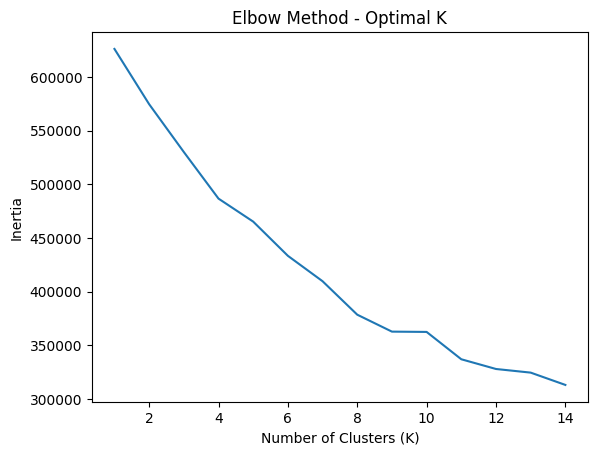

In [81]:
from sklearn.cluster import KMeans

scores = []
k_values = range(1, 15)

for a in k_values:

    # Define and fit KMeans
    kmeans = KMeans(n_clusters=a, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)

    # Save inertia (sum of distances to cluster centers)
    scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores)
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

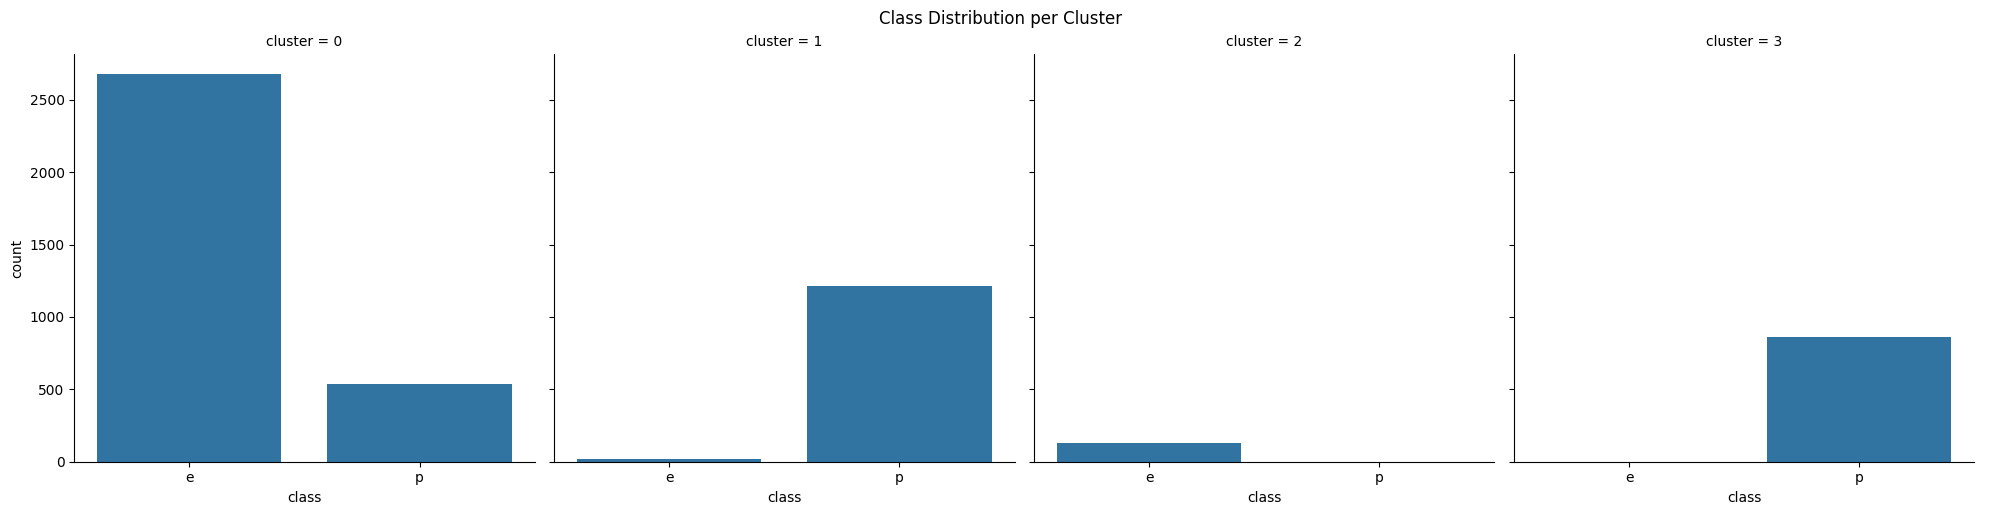

In [82]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # Definir y entrenar Kmeans.

# Preparar el catplot.
cluster_labels = kmeans.predict(X_train_scaled)

plot_df = pd.DataFrame({
    'cluster': cluster_labels,
    'class': y_train.values
})

# Pintar.
ax = sns.catplot(col='cluster', x='class', data=plot_df, kind='count', col_wrap=4)
plt.suptitle('Class Distribution per Cluster', y=1.02)
plt.show()

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

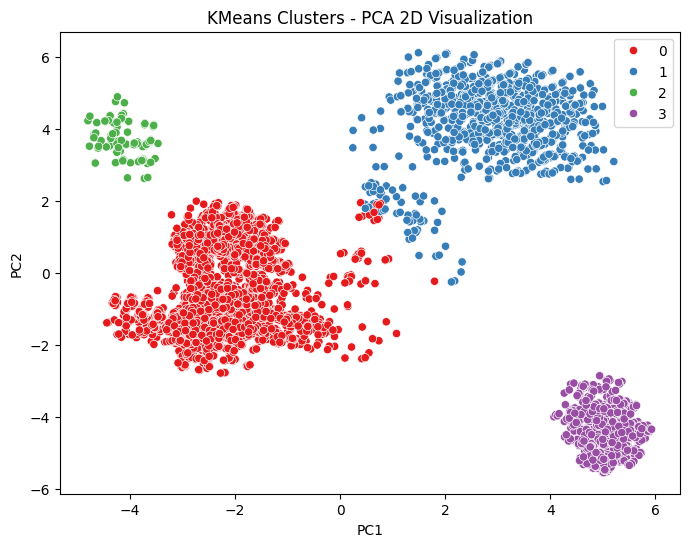

In [83]:
# Entrenar PCA para representar.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
# Usar un color por cada cluster.
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=cluster_labels, palette='Set1')
plt.title('KMeans Clusters - PCA 2D Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.